In [10]:
import numpy as np
import cv2
import depthai as dai
import matplotlib.pyplot as plt

(-0.5, 1919.5, 1079.5, -0.5)

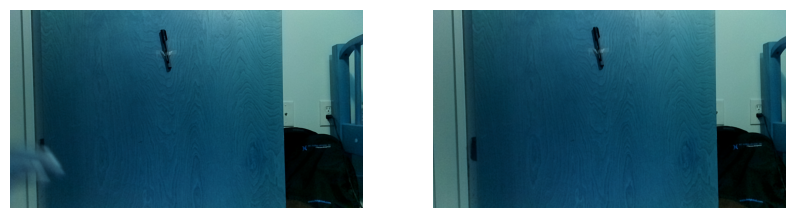

In [11]:
image1 = cv2.imread('images/original_image.png')
image2 = cv2.imread('images/moved_image.png')

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(image1, 'gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(image2, 'gray')
plt.axis('off')

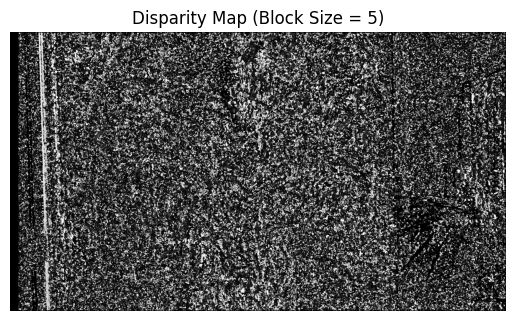

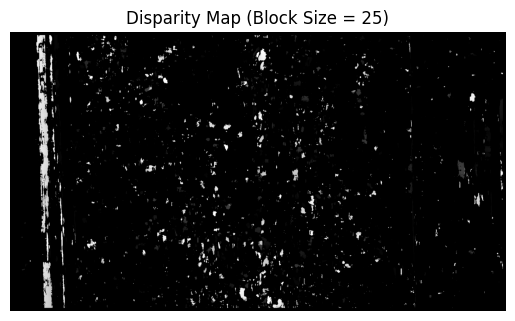

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate disparity
def calcDisparity(image1, image2, bsize=5):
    # Initialize the stereo block matching object
    stereo = cv2.StereoBM_create(numDisparities=32, blockSize=bsize)

    # Convert images to grayscale
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Compute disparity image
    disparity = stereo.compute(gray_image1, gray_image2)

    # Normalize the disparity image for representation
    min_val = np.min(disparity)
    max_val = np.max(disparity)
    normalized_disparity = np.uint8(255 * (disparity - min_val) / (max_val - min_val))

    return normalized_disparity
    
# Compute the disparity map for default block size
result = calcDisparity(image1, image2, bsize=5)
plt.imshow(result, 'gray')
plt.axis('off')
plt.title('Disparity Map (Block Size = 5)')
plt.show()

# Compute the disparity map for larger block size
result = calcDisparity(image1, image2, bsize=25)
plt.imshow(result, 'gray')
plt.axis('off')
plt.title('Disparity Map (Block Size = 25)')
plt.show()

In [16]:
# Baseline (D in question) in millimeters
B = 500  

# Focal length in millimeters
focal_length = 13  

# Initialize depth map with large values
depth_map = np.full_like(result, fill_value=np.inf)

# Compute depth map
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        if result[i, j] != 0:
            # Depth = baseline * focal length / disparity
            depth_map[i, j] = (B * focal_length) / result[i, j]

# Print depth map
print("Depth Map (in millimeters):")
print(depth_map)

Depth Map (in millimeters):
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


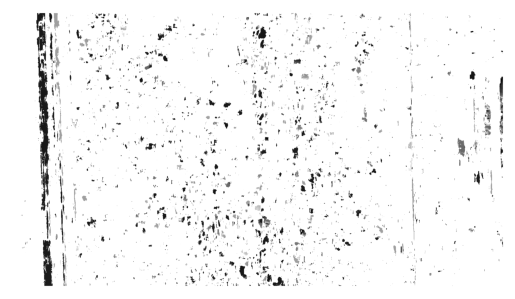

In [17]:
plt.imshow(depth_map, 'gray')
plt.axis('off')
plt.show()